In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
sns.set_theme()
sns.set(font_scale=0.8)

In [11]:
from solardatatools import DataHandler
from solardatatools.solar_noon import energy_com
from solardatatools.signal_decompositions import tl1_l1d1_l2d2p365 as cvx_sd
from solardatatools.signal_decompositions_l2norm import tl1_l1d1_l2d2p365 as cvx_sd_l2norm
from solardatatools.algorithms.capacity_change import CapacityChange

In [3]:
import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
path = "./cassandra/*.csv"

./cassandra/TACHC1022158.csv
tau  0.5 c1  15 c2  100 c3  300
[False  True  True ...  True False False]
[2. 2. 2. ... 2. 2. 2.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


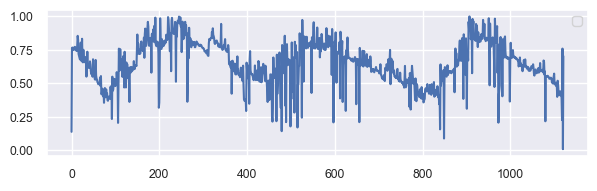

./cassandra/TACIC1066981.csv
tau  0.5 c1  15 c2  100 c3  300
[False  True  True ...  True  True False]
[2.         1.99999995 1.9999999  ... 1.99999996 1.99999998 2.        ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


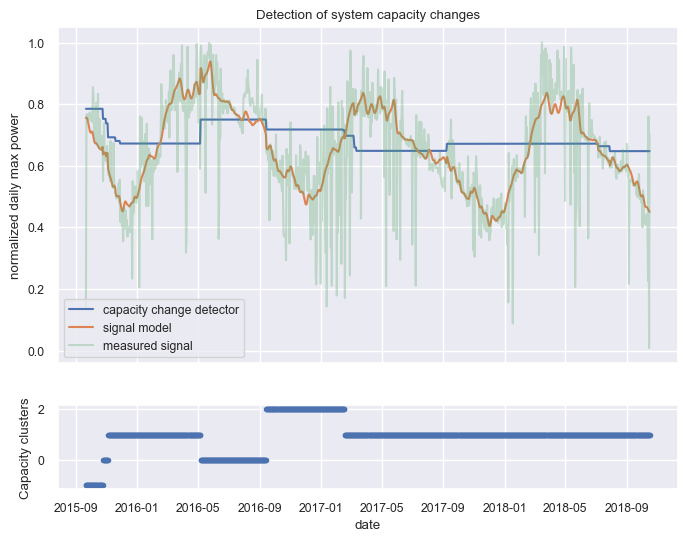

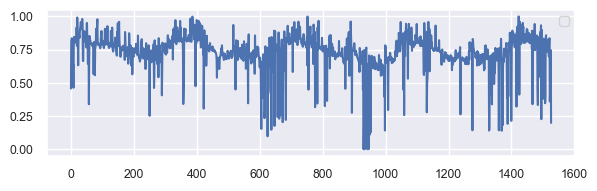

./cassandra/TADKC1095559.csv
tau  0.5 c1  15 c2  100 c3  300
[False  True  True ...  True  True False]
[2. 2. 2. ... 2. 2. 2.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


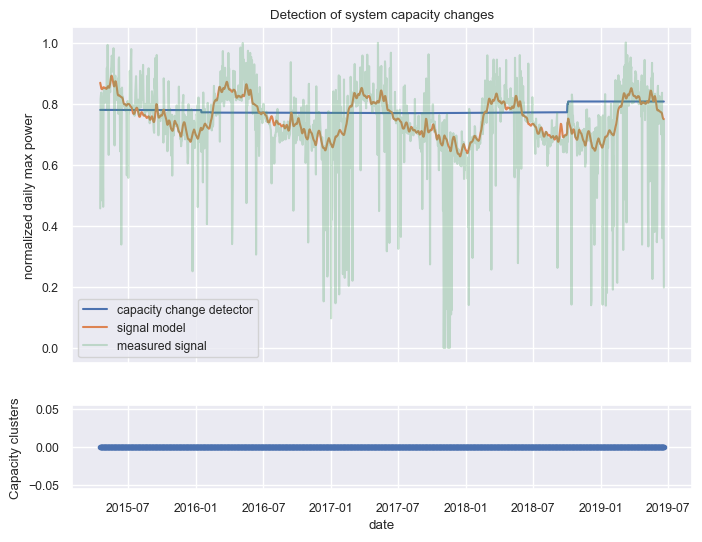

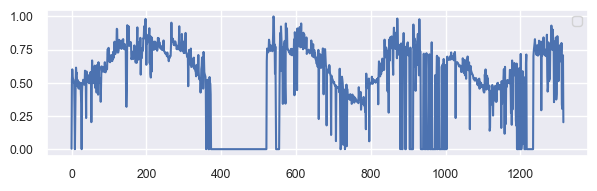

./cassandra/TADBC1077912.csv
tau  0.5 c1  15 c2  100 c3  300
[False  True  True ...  True  True False]
[2.         1.99999996 1.99999991 ... 1.99999999 2.         2.        ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


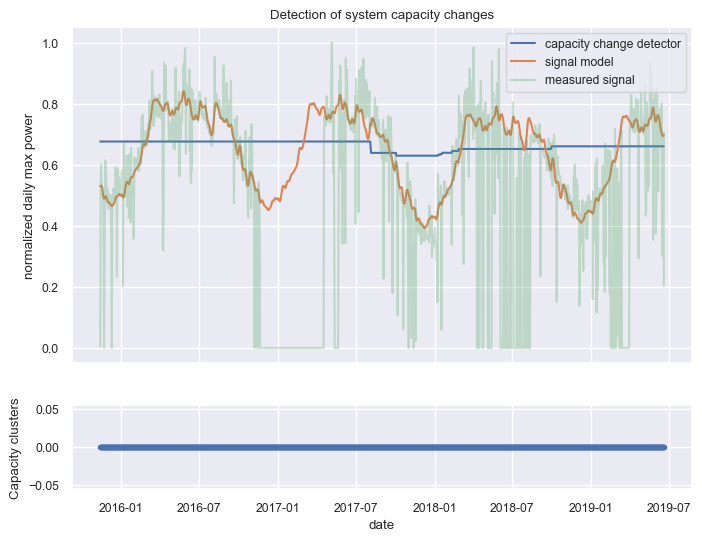

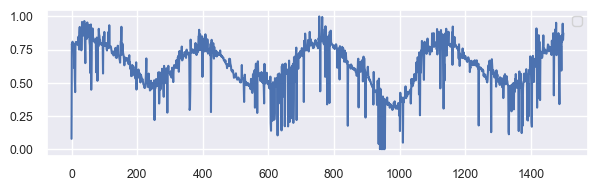

./cassandra/TADKC1094999.csv
tau  0.5 c1  15 c2  100 c3  300
[False  True  True ...  True  True False]
[2. 2. 2. ... 2. 2. 2.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


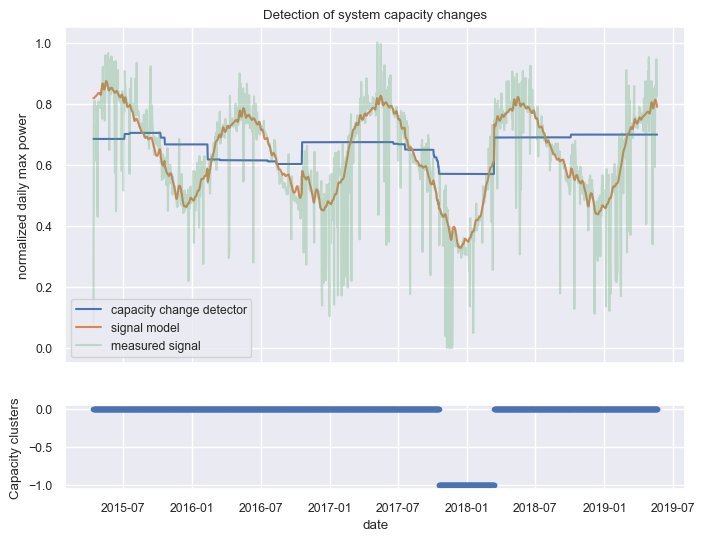

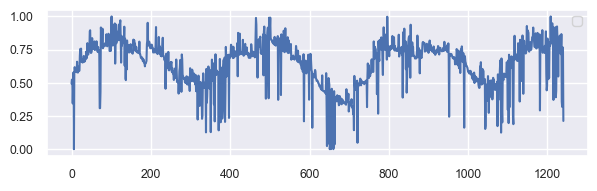

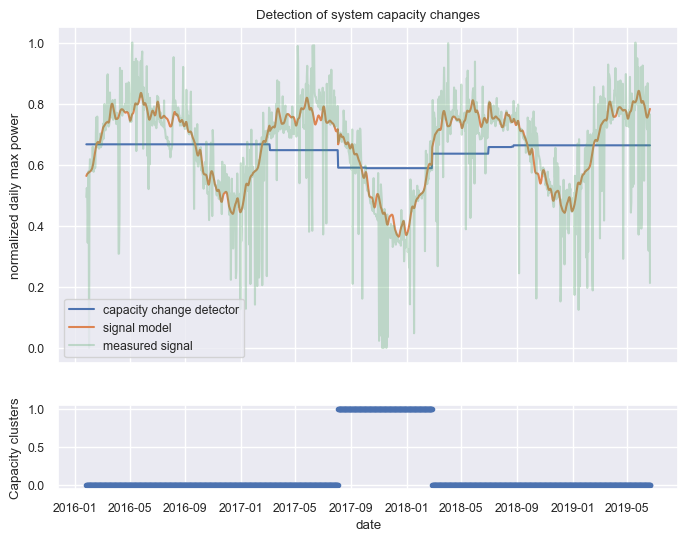

In [7]:
for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname)
    data = df["meas_val_f"] # ac power
    dh = DataHandler(df, convert_to_ts=True)
    dh.run_pipeline(verbose=False)
    data_max = np.max(dh.filled_data_matrix)
    system_capacity_signal = np.max(dh.filled_data_matrix, axis=0)/ data_max

    # plot observed
    f, ax = plt.subplots(1, 1, figsize=(6,2))
    ax.plot(system_capacity_signal);
    plt.tight_layout()
    ax.legend()
    plt.show()
    
    dh.capacity_clustering(plot=True, show_clusters=True)

tau  0.5 c1  15 c2  100 c3  300
[False  True  True ...  True False False]
[2. 2. 2. ... 2. 2. 2.]


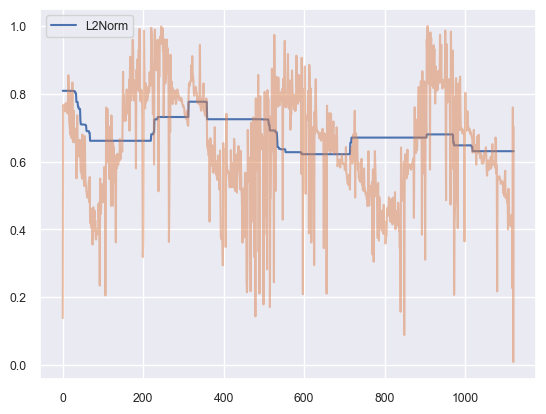

In [10]:
fname = "./cassandra/TACHC1022158.csv"
df = pd.read_csv(fname)
data = df["meas_val_f"] 
dh = DataHandler(df, convert_to_ts=True)
dh.run_pipeline(verbose=False)
data_max = np.max(dh.filled_data_matrix)
system_capacity_signal = np.max(dh.filled_data_matrix, axis=0)/ data_max

cvx_l2n = cvx_sd_l2norm(system_capacity_signal, 
                        tau=0.5, c1=15, c2=100, c3=300, solver="MOSEK")[0]

f, ax1, = plt.subplots(1, 1, sharex=True)
ax1.plot(cvx_l2n, label="L2Norm")
ax1.plot(system_capacity_signal, alpha=0.5);

ax1.legend()
plt.show()


In [17]:
fname = "./cassandra/TACHC1022158.csv"
df = pd.read_csv(fname)
data = df["meas_val_f"] 
dh = DataHandler(df, convert_to_ts=True)
dh.l2norm = False
dh.cc_c2 = 6000
dh.run_pipeline(verbose=False)
# data_max = np.max(dh.filled_data_matrix)
# system_capacity_signal = np.max(dh.filled_data_matrix, axis=0)/ data_max

# cvx_l2n = cvx_sd_l2norm(system_capacity_signal, 
#                         tau=0.5, c1=15, c2=100, c3=300, solver="MOSEK")[0]

# f, ax1, = plt.subplots(1, 1, sharex=True)
# ax1.plot(cvx_l2n, label="L2Norm")
# ax1.plot(system_capacity_signal, alpha=0.5);

# ax1.legend()
# plt.show()


ss c2  6000
ss c2  6000
ss c2  6000
ss c2  6000
ss c2  6000


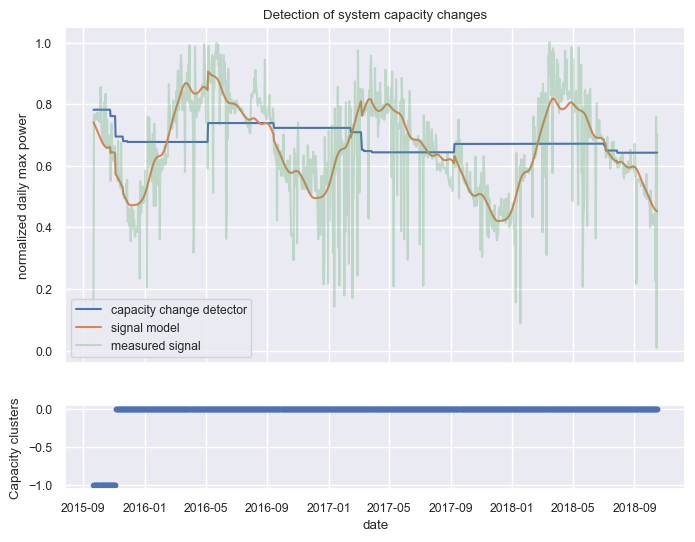

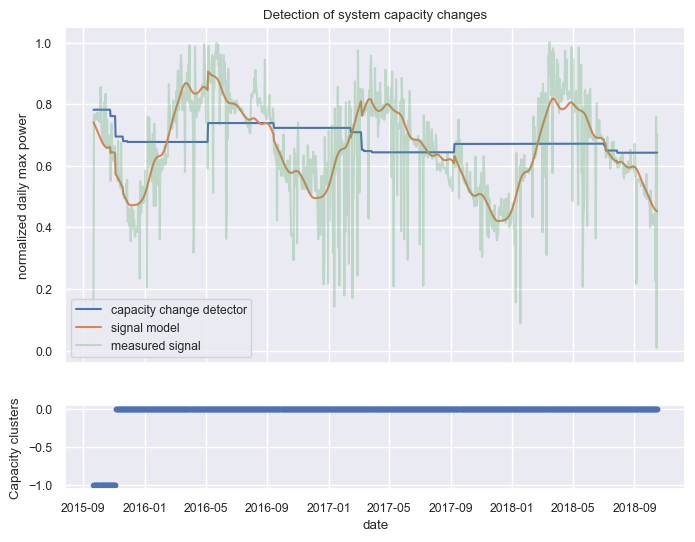

In [18]:
dh.plot_capacity_change_analysis()

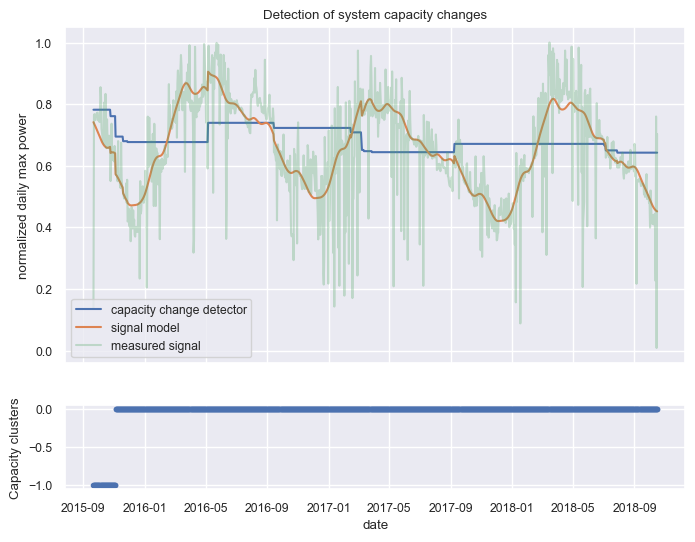

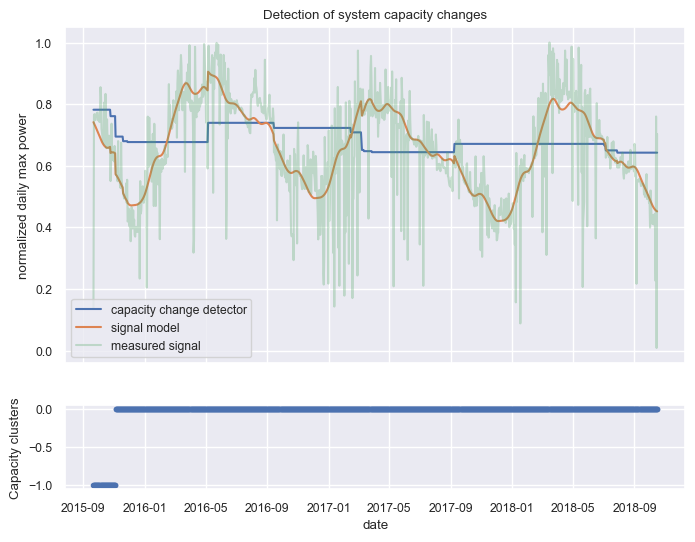

In [19]:
fname = "./cassandra/TACHC1022158.csv"
df = pd.read_csv(fname)
data = df["meas_val_f"] 
dh = DataHandler(df, convert_to_ts=True)
dh.l2norm = True
dh.cc_c2 = 100
dh.run_pipeline(verbose=False)
dh.plot_capacity_change_analysis()
# data_max = np.max(dh.filled_data_matrix)
# system_capacity_signal = np.max(dh.filled_data_matrix, axis=0)/ data_max

# cvx_l2n = cvx_sd_l2norm(system_capacity_signal, 
#                         tau=0.5, c1=15, c2=100, c3=300, solver="MOSEK")[0]

# f, ax1, = plt.subplots(1, 1, sharex=True)
# ax1.plot(cvx_l2n, label="L2Norm")
# ax1.plot(system_capacity_signal, alpha=0.5);

# ax1.legend()
# plt.show()


./cassandra/TACHC1022158.csv


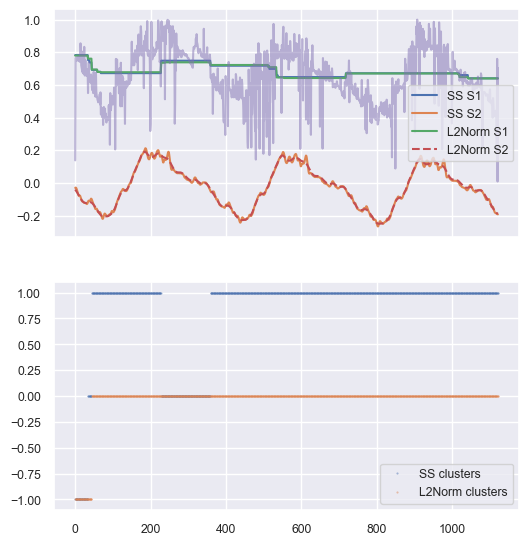

./cassandra/TACIC1066981.csv


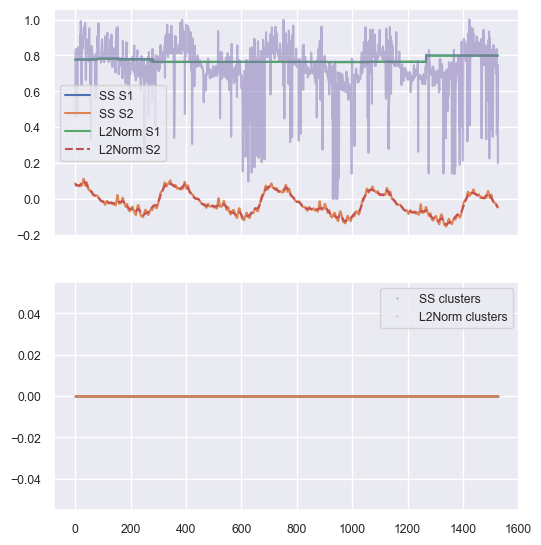

./cassandra/TADKC1095559.csv


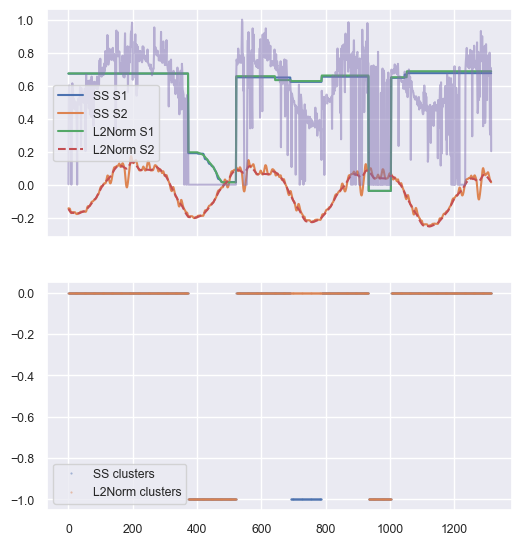

./cassandra/TADBC1077912.csv


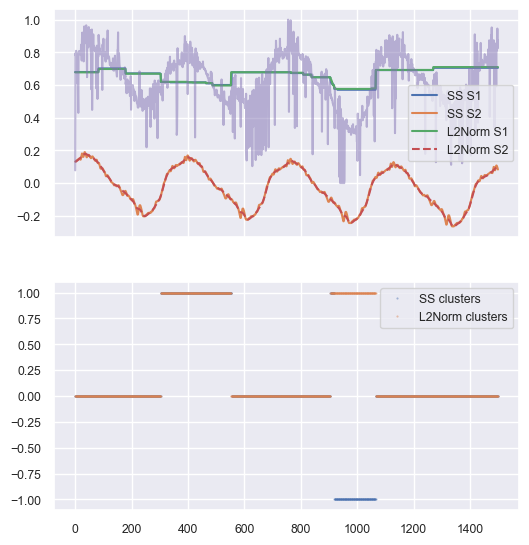

./cassandra/TADKC1094999.csv


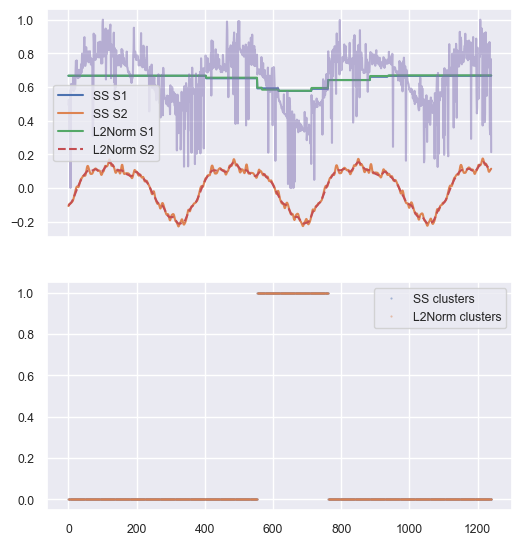

In [42]:
for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname)
    data = df["meas_val_f"] 
    dh = DataHandler(df, convert_to_ts=True)
    dh.run_pipeline(verbose=False)
    data_max = np.max(dh.filled_data_matrix)
    system_capacity_signal = np.max(dh.filled_data_matrix, axis=0)/ data_max

    capacity_analysis = CapacityChange()
    capacity_analysis.run(
        dh.filled_data_matrix,
        #filter=self.daily_flags.no_errors,
        quantile=1.00,
        c1=15,
        c2=100,
        c3=300,
        reweight_eps=0.5,
        reweight_niter=5,
        dbscan_eps=0.02,
        dbscan_min_samples="auto",
        solver="MOSEK",
    )

    capacity_analysis_l2 = CapacityChange()
    capacity_analysis_l2.run(
        dh.filled_data_matrix,
        #filter=self.daily_flags.no_errors,
        quantile=1.00,
        c1=15,
        c2=100,
        c3=300,
        reweight_eps=0.5,
        reweight_niter=5,
        dbscan_eps=0.02,
        dbscan_min_samples="auto",
        solver="MOSEK",
        l2norm=True
    )

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,6.5))
    ax1.plot(capacity_analysis.s1, label="SS S1")
    ax1.plot(capacity_analysis.s2, label="SS S2")
    ax1.plot(capacity_analysis_l2.s1, label="L2Norm S1")
    ax1.plot(capacity_analysis_l2.s2, label="L2Norm S2", linestyle="--")
    ax1.plot(system_capacity_signal, alpha=0.5);

    ax2.plot(capacity_analysis.labels, label="SS clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    ax2.plot(capacity_analysis_l2.labels, label="L2Norm clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    

    ax1.legend()
    ax2.legend()
    plt.show()

# Optimize L2 component weight while minimizing mae of residual between _L1 components_

In [44]:
# save data
filled_mtx = {}

for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname)
    data = df["meas_val_f"] 
    dh = DataHandler(df, convert_to_ts=True)
    dh.run_pipeline(verbose=False)
    filled_mtx[fname] = dh.filled_data_matrix

./cassandra/TACHC1022158.csv
./cassandra/TACIC1066981.csv
./cassandra/TADKC1095559.csv
./cassandra/TADBC1077912.csv
./cassandra/TADKC1094999.csv


In [20]:
results = {}

In [ ]:
dh.capacity_analysis.s

In [21]:
weight_iter = np.logspace(3.77, 3.9, 120)

def run(sig):
    mae_list = []
    
    df = pd.read_csv(sig)
    data = df["meas_val_f"] 
    dh = DataHandler(df, convert_to_ts=True)
    dh.l2norm = True
    dh.cc_c2 = 100
    dh.run_pipeline(verbose=False)
        
    for w in tqdm(weight_iter):
        df = pd.read_csv(sig)
        data = df["meas_val_f"] 
        dh2 = DataHandler(df, convert_to_ts=True)
        dh2.l2norm = False
        dh2.cc_c2 = w
        dh2.run_pipeline(verbose=False)
        mae_list.append(mae(dh.capacity_analysis.s1, dh2.capacity_analysis.s1))
        
    return weight_iter[np.argmin(mae_list)], np.min(mae_list), mae_list

# Running cell below

In [23]:
for fname in glob.glob(path):
    r = run(fname)
    results[f"{fname}_weight_min"] =  r[0]
    results[f"{fname}_mae_min"] = r[1]
    results[f"{fname}_mae_list"] = r[2]
    plt.plot(weight_iter, results[f"{fname}_mae_list"])
    plt.show()

DCPError: Product of two non-constant expressions is not DCP.

MAE s_hat  (OSD,CVX)   1.95e-05


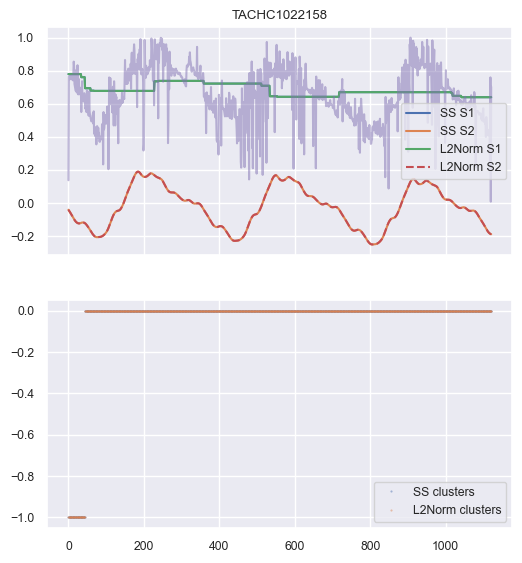

MAE s_hat  (OSD,CVX)   9.02e-07


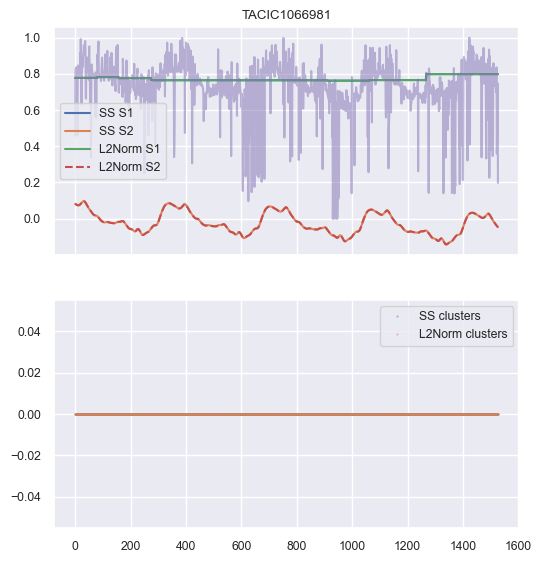

MAE s_hat  (OSD,CVX)   3.05e-06


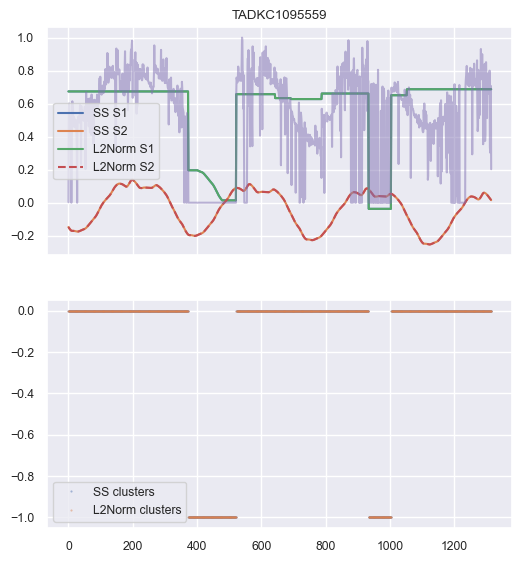

MAE s_hat  (OSD,CVX)   3.76e-05


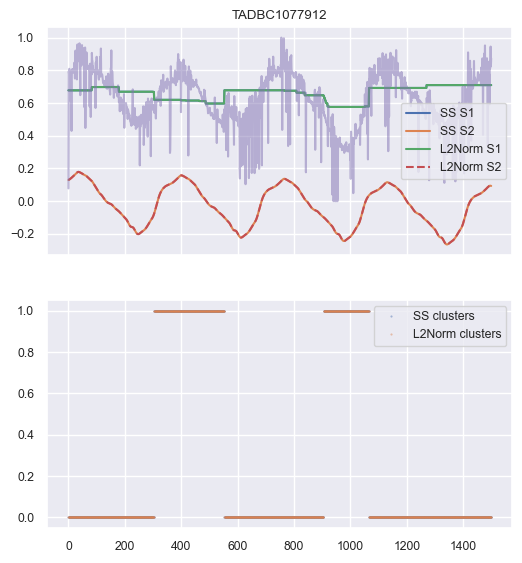

MAE s_hat  (OSD,CVX)   8.25e-05


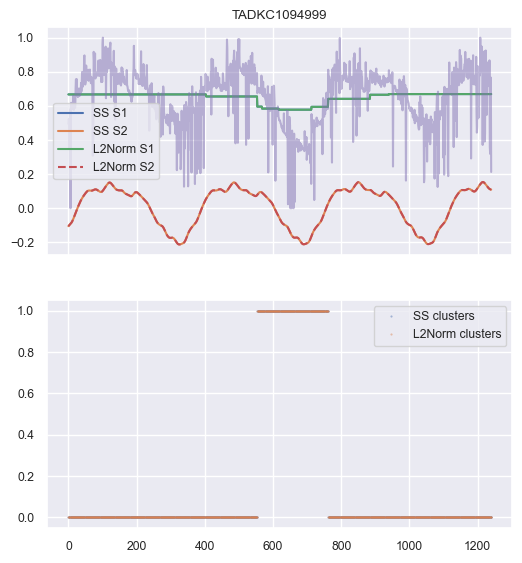

In [87]:
for fname in glob.glob(path):
    m = filled_mtx[fname]

    capacity_analysis = CapacityChange()
    capacity_analysis.run(
        m,
        #filter=self.daily_flags.no_errors,
        quantile=1.00,
        c1=15,
        c2= results[f"{fname}_weight_min"],
        c3=300,
        reweight_eps=0.5,
        reweight_niter=5,
        dbscan_eps=0.02,
        dbscan_min_samples="auto",
        solver="MOSEK",
    )

    capacity_analysis_l2 = CapacityChange()
    capacity_analysis_l2.run(
        m,
        #filter=self.daily_flags.no_errors,
        quantile=1.00,
        c1=15,
        c2=100,
        c3=300,
        reweight_eps=0.5,
        reweight_niter=5,
        dbscan_eps=0.02,
        dbscan_min_samples="auto",
        solver="MOSEK",
        l2norm=True
    )

    print(f'MAE s_hat  (OSD,CVX)   {mae(capacity_analysis_l2.s1, capacity_analysis.s1):.2e}')

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,6.5))
    ax1.plot(capacity_analysis.s1, label="SS S1")
    ax1.plot(capacity_analysis.s2, label="SS S2")
    ax1.plot(capacity_analysis_l2.s1, label="L2Norm S1")
    ax1.plot(capacity_analysis_l2.s2, label="L2Norm S2", linestyle="--")
    ax1.plot(capacity_analysis.metric, alpha=0.5);

    ax2.plot(capacity_analysis.labels, label="SS clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    ax2.plot(capacity_analysis_l2.labels, label="L2Norm clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    
    ax1.set_title(fname[12:-4])
    ax1.legend()
    ax2.legend()
    plt.show()

In [93]:
weights = []
for fname in glob.glob(path):
    print(f'{fname[12:-4]}, new weight: {results[f"{fname}_weight_min"]:.2f}')
    weights.append(results[f"{fname}_weight_min"])

TACHC1022158, new weight: 5888.44
TACIC1066981, new weight: 6561.07
TADKC1095559, new weight: 7668.42
TADBC1077912, new weight: 7943.28
TADKC1094999, new weight: 5888.44


In [78]:
np.median(weights)

6561.071792493107

MAE s_hat  (OSD,CVX)   4.47e-04


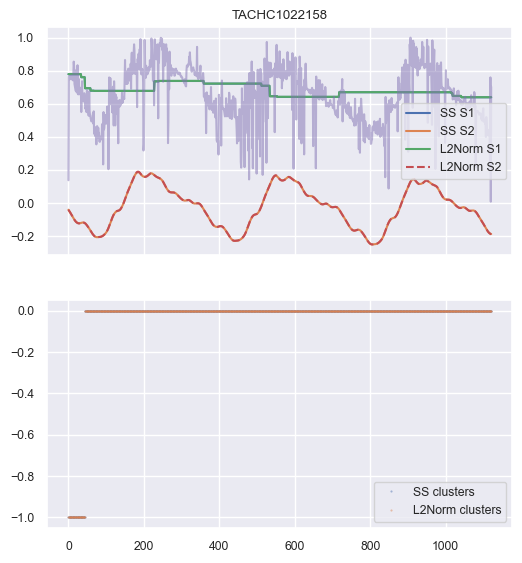

MAE s_hat  (OSD,CVX)   9.02e-07


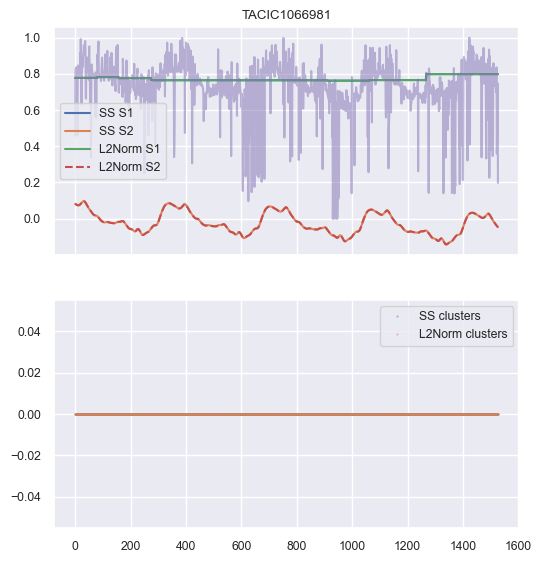

MAE s_hat  (OSD,CVX)   3.77e-04


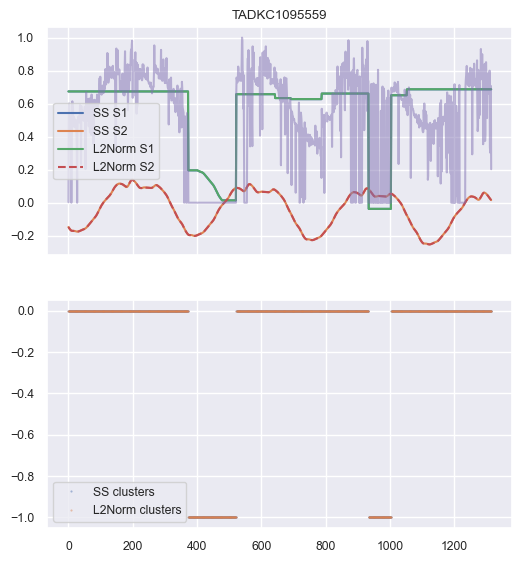

MAE s_hat  (OSD,CVX)   7.11e-04


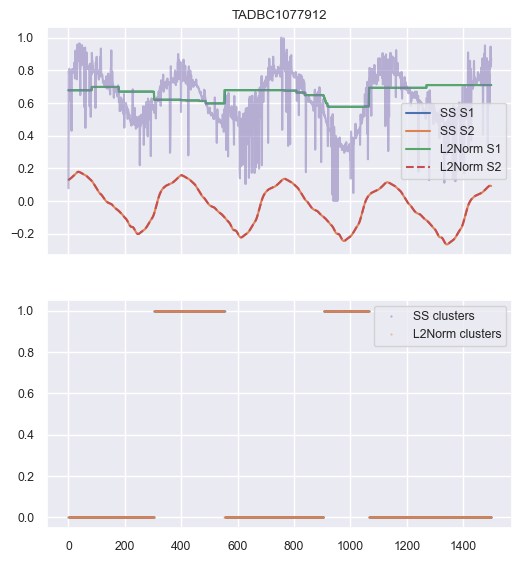

MAE s_hat  (OSD,CVX)   8.34e-04


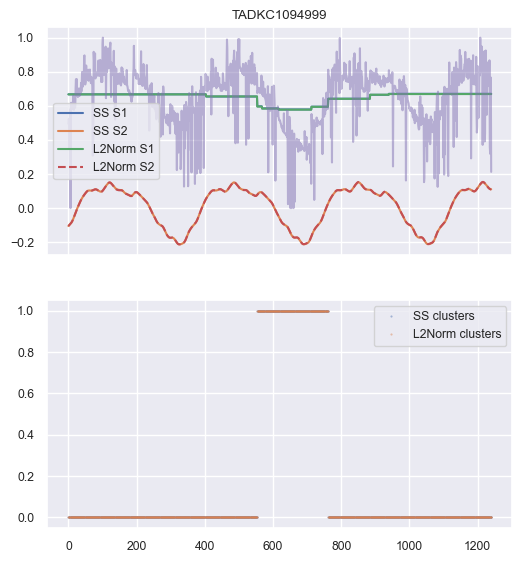

In [88]:
for fname in glob.glob(path):
    m = filled_mtx[fname]

    capacity_analysis = CapacityChange()
    capacity_analysis.run(
        m,
        #filter=self.daily_flags.no_errors,
        quantile=1.00,
        c1=15,
        c2= np.median(weights),
        c3=300,
        reweight_eps=0.5,
        reweight_niter=5,
        dbscan_eps=0.02,
        dbscan_min_samples="auto",
        solver="MOSEK",
    )

    capacity_analysis_l2 = CapacityChange()
    capacity_analysis_l2.run(
        m,
        #filter=self.daily_flags.no_errors,
        quantile=1.00,
        c1=15,
        c2=100,
        c3=300,
        reweight_eps=0.5,
        reweight_niter=5,
        dbscan_eps=0.02,
        dbscan_min_samples="auto",
        solver="MOSEK",
        l2norm=True
    )

    print(f'MAE s_hat  (OSD,CVX)   {mae(capacity_analysis_l2.s1, capacity_analysis.s1):.2e}')

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,6.5))
    ax1.plot(capacity_analysis.s1, label="SS S1")
    ax1.plot(capacity_analysis.s2, label="SS S2")
    ax1.plot(capacity_analysis_l2.s1, label="L2Norm S1")
    ax1.plot(capacity_analysis_l2.s2, label="L2Norm S2", linestyle="--")
    ax1.plot(capacity_analysis.metric, alpha=0.5);

    ax2.plot(capacity_analysis.labels, label="SS clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    ax2.plot(capacity_analysis_l2.labels, label="L2Norm clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    

    ax1.legend()
    ax2.legend()
    ax1.set_title(fname[12:-4])
    plt.show()

In [97]:
dh.keys

[(('TAEKC1077772', '2000624352_SPR-7000m-U'), 'ac_power_01'),
 (('TAEKC1077772', '2007355741_SPR-7000m-U'), 'ac_power_02')]

In [99]:
dh.run_pipeline(power_col='ac_power_02')

,ac_power_01,ac_power_02,seq_index
ts,,,
2016-03-01 09:35:00,3.1070,NaN,0
2016-03-01 09:40:00,2.9348,NaN,1
2016-03-01 09:45:00,3.0582,NaN,2
2016-03-01 09:50:00,3.5394,NaN,3
2016-03-01 09:55:00,3.1196,NaN,4
...,...,...,...
2019-01-16 11:00:00,NaN,0.9511,153273
2019-01-16 11:05:00,NaN,1.1043,153274
2019-01-16 11:10:00,NaN,1.1928,153275


## Check small/large len data with median weight

In [89]:
path_sl = "./cassandra/small_large/*_cap_ch.csv"

In [90]:
for fname in glob.glob(path_sl):
    print(fname)
    df = pd.read_csv(fname)
    data = df["meas_val_f"] 
    dh = DataHandler(df, convert_to_ts=True)
    dh.run_pipeline(verbose=False)
    filled_mtx[fname] = dh.filled_data_matrix

./cassandra/small_large/TABC01142170_cap_ch.csv
./cassandra/small_large/TAEKC1077772_cap_ch.csv


MAE s_hat  (OSD,CVX)   1.37e-04


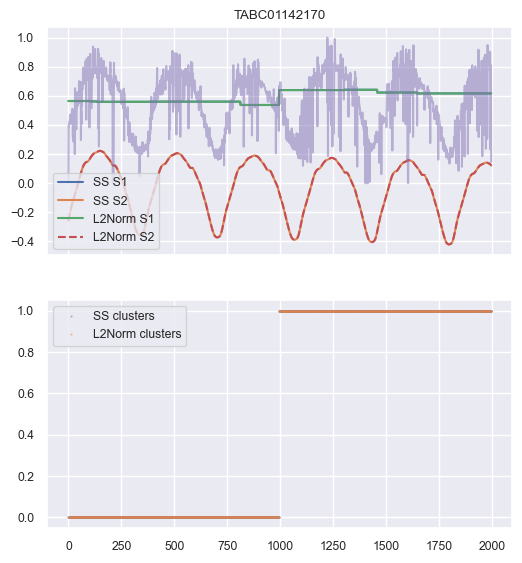

MAE s_hat  (OSD,CVX)   7.82e-04


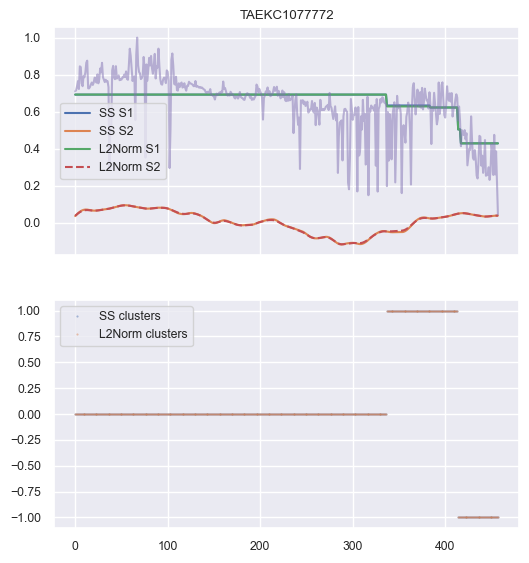

In [95]:
for fname in glob.glob(path_sl):
    m = filled_mtx[fname]

    capacity_analysis = CapacityChange()
    capacity_analysis.run(
        m,
        #filter=self.daily_flags.no_errors,
        quantile=1.00,
        c1=15,
        c2= np.median(weights),
        c3=300,
        reweight_eps=0.5,
        reweight_niter=5,
        dbscan_eps=0.02,
        dbscan_min_samples="auto",
        solver="MOSEK",
    )

    capacity_analysis_l2 = CapacityChange()
    capacity_analysis_l2.run(
        m,
        #filter=self.daily_flags.no_errors,
        quantile=1.00,
        c1=15,
        c2=100,
        c3=300,
        reweight_eps=0.5,
        reweight_niter=5,
        dbscan_eps=0.02,
        dbscan_min_samples="auto",
        solver="MOSEK",
        l2norm=True
    )

    print(f'MAE s_hat  (OSD,CVX)   {mae(capacity_analysis_l2.s1, capacity_analysis.s1):.2e}')

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,6.5))
    ax1.plot(capacity_analysis.s1, label="SS S1")
    ax1.plot(capacity_analysis.s2, label="SS S2")
    ax1.plot(capacity_analysis_l2.s1, label="L2Norm S1")
    ax1.plot(capacity_analysis_l2.s2, label="L2Norm S2", linestyle="--")
    ax1.plot(capacity_analysis.metric, alpha=0.5);

    ax2.plot(capacity_analysis.labels, label="SS clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    ax2.plot(capacity_analysis_l2.labels, label="L2Norm clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    ax1.set_title(fname[24:-11])

    ax1.legend()
    ax2.legend()
    
    plt.show()

# Conclusion
 
I can't tell visually if the original weights are good because I don't see the capacity changes? Does the L2 comp need to be smoother?

Optimization seems to agree overall.



# Check linear term 